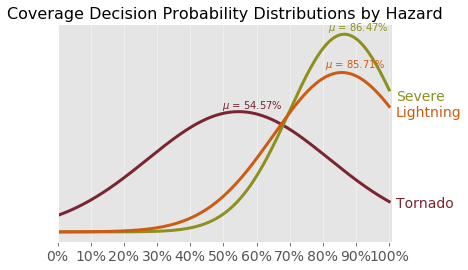

           Statistics    Tornado     Severe  Lightning
0                Mean  54.574468  86.466667  85.714286
1  Standard Deviation  27.363390  16.648790  20.646441
       Crawl  Social Media  Weathercast  Short Cut-In  Continuous
0  38.750000     45.833333    45.000000     59.411765   62.307692
1  12.437343     25.069348    28.809721     25.945778   30.230867


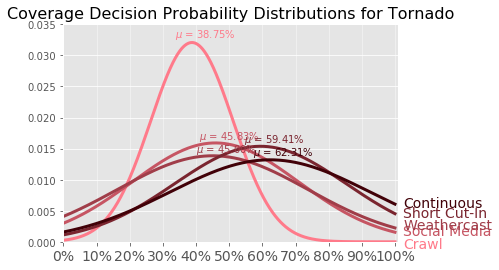

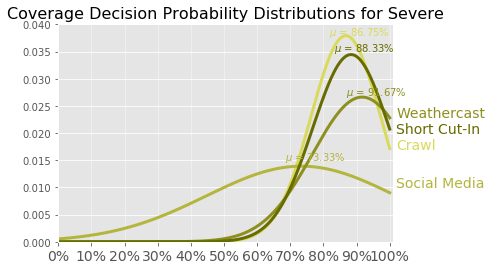

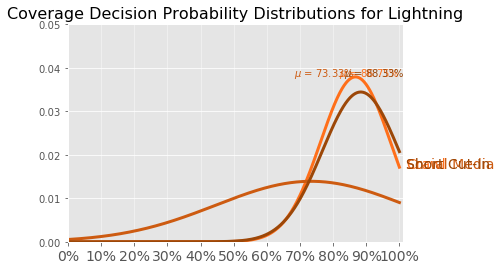

In [5]:
import csv
import numpy as np
import scipy.io as sci
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.patches as patches
from mpl_toolkits.basemap import Basemap

#Read csv into pandas dataframe
bmdf = pd.read_csv('ThreeWeeksRaw.csv')
#bmdf.values
bmdf.head()

#Calculate tornado probability statistics...for all coverage types
ptor  = bmdf.loc[bmdf['Hazard']==1,'Object Probability %']
#Drop NaN values from the pandas dataframe
ptor1 = ptor.dropna()
#print (ptor1)
mutor = np.mean(ptor1)
sigmator = np.std(ptor1)

#Calculate severe probability statistics...for all coverage types
psvr  = bmdf.loc[bmdf['Hazard']==2,'Object Probability %']
#Drop NaN values from the pandas dataframe
psvr1 = psvr.dropna()
#print (psvr1)
musvr = np.mean(psvr1)
sigmasvr = np.std(psvr1)

#Calculate lightning probability statistics...for all coverage types
pltg  = bmdf.loc[bmdf['Hazard']==3,'Object Probability %']
#Drop NaN values from the pandas dataframe
pltg1 = pltg.dropna()
#print (pltg1)
multg = np.mean(pltg1)
sigmaltg = np.std(pltg1)

#Load KPHI logo for plotting later
mpl.style.use('ggplot')
#KPHI = plt.imread('KPHI.gif’)

#----------------------------------------------------------------------------------------------------------------------
#Plot PDFs for ALL hazards
x = np.linspace(0, 100, 1000)
plt.plot(x,mlab.normpdf(x, mutor, sigmator),color="#7a252f",linewidth=3)
plt.plot(x,mlab.normpdf(x, musvr, sigmasvr),color="#8d901e",linewidth=3)
plt.plot(x,mlab.normpdf(x, multg, sigmaltg),color="#cd5b11",linewidth=3)

#Set x-axis limits
plt.xlim(0, 101) 
#Set x-axis ticks
plt.xticks(range(0, 101, 10), [str(x) + "%" for x in range(0, 101, 10)], fontsize=14) 
#Set y-axis values to invisible
ax1 = plt.axes()
y_axis = ax1.axes.get_yaxis()
y_axis.set_visible(False)
axvlines = ax1.xaxis.grid(alpha = 0.5)
#Plot label for each PDF line
plt.text(102,0.003,'Tornado',fontsize = 14,color="#7a252f")
plt.text(102,0.016,'Severe',fontsize = 14,color="#8d901e")
plt.text(102,0.014,'Lightning',fontsize = 14,color="#cd5b11")
#Plot labels for means
plt.text(mutor-5,0.015,'$\mu$ = {:.2f}'.format(mutor)+"%",fontsize = 10, color="#7a252f")
plt.text(musvr-5,0.0245,'$\mu$ = {:.2f}'.format(musvr)+"%",fontsize = 10, color="#8d901e")
plt.text(multg-5,0.020,'$\mu$ = {:.2f}'.format(multg)+"%",fontsize = 10, color="#cd5b11")
#Plot title
plt.title('Coverage Decision Probability Distributions by Hazard',fontsize = 16)
plt.show()


#----------------------------------------------------------------------------------------------------------------------
#Create pandas dataframe for statistics table for ALL Hazards
stats_data = {'Statistics': ['Mean', 'Standard Deviation'],
        'Tornado': [mutor,sigmator],
        'Severe': [musvr,sigmasvr],
        'Lightning': [multg,sigmaltg]}
bmstatsdf = pd.DataFrame(stats_data, columns = ['Statistics', 'Tornado', 'Severe', 'Lightning'])
print (bmstatsdf)


#----------------------------------------------------------------------------------------------------------------------
#Calculate TORNADO probability statistics for each kind of coverage type
ptorcrawl  = bmdf.loc[(bmdf['Hazard']==1) & (bmdf['Coverage type']==1),"Object Probability %"]
ptorsm     = bmdf.loc[(bmdf['Hazard']==1) & (bmdf['Coverage type']==2),"Object Probability %"]
ptorwxcast = bmdf.loc[(bmdf['Hazard']==1) & (bmdf['Coverage type']==3),"Object Probability %"]
ptorcutin  = bmdf.loc[(bmdf['Hazard']==1) & (bmdf['Coverage type']==4),"Object Probability %"]
ptorwall   = bmdf.loc[(bmdf['Hazard']==1) & (bmdf['Coverage type']==5),"Object Probability %"]

#Eliminate NaN
ptorcrawl1  = ptorcrawl.dropna()
ptorsm1     = ptorsm.dropna()
ptorwxcast1 = ptorwxcast.dropna()
ptorcutin1  = ptorcutin.dropna()
ptorwall1   = ptorwall.dropna()

#Calculate mean and standard deviation
mutorcrawl     = np.mean(ptorcrawl1)
sigmatorcrawl  = np.std(ptorcrawl1)
mutorsm        = np.mean(ptorsm1)
sigmatorsm     = np.std(ptorsm1)
mutorwxcast    = np.mean(ptorwxcast1)
sigmatorwxcast = np.std(ptorwxcast1)
mutorcutin     = np.mean(ptorcutin1)
sigmatorcutin  = np.std(ptorcutin1)	
mutorwall      = np.mean(ptorwall1)
sigmatorwall   = np.std(ptorwall1)

stats_data1 = {'Tornado Statistics': ['Mean', 'Standard Deviation'],
        'Crawl': [mutorcrawl,sigmatorcrawl],
        'Social Media': [mutorsm,sigmatorsm],
        'Weathercast': [mutorwxcast,sigmatorwxcast],
		'Short Cut-In': [mutorcutin,sigmatorcutin],
		'Continuous': [mutorwall,sigmatorwall]}
torstats = pd.DataFrame(stats_data1, columns = ['Crawl', 'Social Media', 'Weathercast','Short Cut-In','Continuous'])
print (torstats)

#Make TORNADO coverage types PDFS
x = np.linspace(0, 100, 1000)
plt.plot(x,mlab.normpdf(x, mutorcrawl, sigmatorcrawl),color="#ff7a8a",linewidth=3)
plt.plot(x,mlab.normpdf(x, mutorsm, sigmatorsm),color="#c65563",linewidth=3)
plt.plot(x,mlab.normpdf(x, mutorwxcast, sigmatorwxcast),color="#a03d49",linewidth=3)
plt.plot(x,mlab.normpdf(x, mutorcutin, sigmatorcutin),color="#7a252f",linewidth=3)
plt.plot(x,mlab.normpdf(x, mutorwall, sigmatorwall),color="#410108",linewidth=3)
y = 0.35
#Set x-axis limits
plt.xlim(0, 101) 
#Set x-axis ticks
plt.xticks(range(0, 101, 10), [str(x) + "%" for x in range(0, 101, 10)], fontsize=14)
#Set y-axis ticks
plt.ylim(0, 0.035) 
#Set y-axis values to invisible
ax1 = plt.axes()
axvlines = ax1.xaxis.grid(alpha = 0.5)
#ax1.figure.figimage(KPHI, 40, 40, alpha=.50, zorder=1)
#y_axis = ax1.axes.get_yaxis()
#y_axis.set_visible(False)
#Plot label for each PDF line
plt.text(102.5,-0.001,'Crawl',fontsize = 14,color="#ff7a8a")
plt.text(102.5,0.001,'Social Media',fontsize = 14,color="#c65563")
plt.text(102.5,0.0021,'Weathercast',fontsize = 14,color="#a03d49")
plt.text(102.5,0.004,'Short Cut-In',fontsize = 14,color="#7a252f")
plt.text(102.5,0.0055,'Continuous',fontsize = 14,color="#410108")
#Plot labels for means
plt.text(mutorcrawl-5,0.033,'$\mu$ = {:.2f}'.format(mutorcrawl)+"%",fontsize = 10, color="#ff7a8a")
plt.text(mutorsm-5,0.0165,'$\mu$ = {:.2f}'.format(mutorsm)+"%",fontsize = 10, color="#c65563")
plt.text(mutorwxcast-5,0.0145,'$\mu$ = {:.2f}'.format(mutorwxcast)+"%",fontsize = 10, color="#a03d49")
plt.text(mutorcutin-5,0.016,'$\mu$ = {:.2f}'.format(mutorcutin)+"%",fontsize = 10, color="#7a252f")
plt.text(mutorwall-5,0.014,'$\mu$ = {:.2f}'.format(mutorwall)+"%",fontsize = 10, color="#410108")
#Plot title
plt.title('Coverage Decision Probability Distributions for Tornado',fontsize = 16)
plt.show()


#----------------------------------------------------------------------------------------------------------------------
#Calculate SEVERE probability statistics for each kind of coverage type
psvrcrawl  = bmdf.loc[(bmdf['Hazard']==2) & (bmdf['Coverage type']==1),"Object Probability %"]
psvrsm     = bmdf.loc[(bmdf['Hazard']==2) & (bmdf['Coverage type']==2),"Object Probability %"]
psvrwxcast = bmdf.loc[(bmdf['Hazard']==2) & (bmdf['Coverage type']==3),"Object Probability %"]
psvrcutin  = bmdf.loc[(bmdf['Hazard']==2) & (bmdf['Coverage type']==4),"Object Probability %"]

#Eliminate NaN
psvrcrawl1  = psvrcrawl.dropna()
psvrsm1     = psvrsm.dropna()
psvrwxcast1 = psvrwxcast.dropna()
psvrcutin1  = psvrcutin.dropna()

#Calculate mean and standard deviation
musvrcrawl     = np.mean(psvrcrawl1)
sigmasvrcrawl  = np.std(psvrcrawl1)
musvrsm        = np.mean(psvrsm1)
sigmasvrsm     = np.std(psvrsm1)
musvrwxcast    = np.mean(psvrwxcast1)
sigmasvrwxcast = np.std(psvrwxcast1)
musvrcutin     = np.mean(psvrcutin1)
sigmasvrcutin  = np.std(psvrcutin1)	


#Plot SEVERE coverage types PDFS
x = np.linspace(0, 100, 1000)
plt.plot(x,mlab.normpdf(x, musvrcrawl, sigmasvrcrawl),color="#d9da5b",linewidth=3)
plt.plot(x,mlab.normpdf(x, musvrsm, sigmasvrsm),color="#b3b53d",linewidth=3)
plt.plot(x,mlab.normpdf(x, musvrwxcast, sigmasvrwxcast),color="#8d901e",linewidth=3)
plt.plot(x,mlab.normpdf(x, musvrcutin, sigmasvrcutin),color="#676b00",linewidth=3)

#Set x-axis limits
plt.xlim(0, 101) 
#Set x-axis ticks
plt.xticks(range(0, 101, 10), [str(x) + "%" for x in range(0, 101, 10)], fontsize=14) 
#Set y-axis ticks
plt.ylim(0, 0.04)
#Set y-axis values to invisible
ax1 = plt.axes()
axvlines = ax1.xaxis.grid(alpha = 0.5)
#ax1.figure.figimage(KPHI, 40, 40, alpha=.50, zorder=1)
#ax1 = plt.axes()
#y_axis = ax1.axes.get_yaxis()
#y_axis.set_visible(False)
#Plot label for each PDF line
plt.text(102,0.017,'Crawl',fontsize = 14,color="#d9da5b")
plt.text(102,0.010,'Social Media',fontsize = 14,color="#b3b53d")
plt.text(102,0.023,'Weathercast',fontsize = 14,color="#8d901e")
plt.text(102,0.020,'Short Cut-In',fontsize = 14,color="#676b00")
#Plot labels for means
plt.text(musvrcrawl-5,0.038,'$\mu$ = {:.2f}'.format(musvrcrawl)+"%",fontsize = 10, color="#d9da5b")
plt.text(musvrsm-5,0.015,'$\mu$ = {:.2f}'.format(musvrsm)+"%",fontsize = 10, color="#b3b53d")
plt.text(musvrwxcast-5,0.027,'$\mu$ = {:.2f}'.format(musvrwxcast)+"%",fontsize = 10, color="#8d901e")
plt.text(musvrcutin-5,0.035,'$\mu$ = {:.2f}'.format(musvrcutin)+"%",fontsize = 10, color="#676b00")

#Plot title
plt.title('Coverage Decision Probability Distributions for Severe',fontsize = 16)

plt.show()

#----------------------------------------------------------------------------------------------------------------------
#Calculate LIGHTNING probability statistics for each kind of coverage type
pltgcrawl = bmdf.loc[(bmdf['Hazard']==3) & (bmdf['Coverage type']==1),"Object Probability %"]
pltgsm    = bmdf.loc[(bmdf['Hazard']==3) & (bmdf['Coverage type']==2),"Object Probability %"]
pltgcutin = bmdf.loc[(bmdf['Hazard']==3) & (bmdf['Coverage type']==4),"Object Probability %"]

#Eliminate NaN
pltgcrawl1 = psvrcrawl.dropna()
pltgsm1    = psvrsm.dropna()
pltgcutin1 = psvrcutin.dropna()

#Calculate mean and standard deviation
multgcrawl    = np.mean(pltgcrawl1)
sigmaltgcrawl = np.std(pltgcrawl1)
multgsm       = np.mean(pltgsm1)
sigmaltgsm    = np.std(pltgsm1)
multgcutin    = np.mean(pltgcutin1)
sigmaltgcutin = np.std(pltgcutin1)

#Plot LIGHTNING coverage types PDFS
x = np.linspace(0, 100, 1000)
plt.plot(x,mlab.normpdf(x, multgcrawl, sigmaltgcrawl),color="#ff6f1a",linewidth=3)
plt.plot(x,mlab.normpdf(x, multgsm, sigmaltgsm),color="#cd5b11",linewidth=3)
plt.plot(x,mlab.normpdf(x, multgcutin, sigmaltgcutin),color="#9c4708",linewidth=3)


#Set x-axis limits
plt.xlim(0, 101) 
#Set x-axis ticks
plt.xticks(range(0, 101, 10), [str(x) + "%" for x in range(0, 101, 10)], fontsize=14) 
#Set y-axis ticks
plt.ylim(0, 0.05)
#Set y-axis values to invisible
ax1 = plt.axes()
axvlines = ax1.xaxis.grid(alpha = 0.5)
#ax1 = plt.axes()
#y_axis = ax1.axes.get_yaxis()
#y_axis.set_visible(False)
#Plot label for each PDF line
plt.text(102,0.017,'Crawl',fontsize = 14,color="#ff6f1a")
plt.text(102,0.017,'Social Media',fontsize = 14,color="#cd5b11")
plt.text(102,0.017,'Short Cut-In',fontsize = 14,color="#9c4708")
#Plot labels for means
plt.text(multgcrawl-5,0.038,'$\mu$ = {:.2f}'.format(multgcrawl)+"%",fontsize = 10, color="#ff6f1a")
plt.text(multgsm-5,0.038,'$\mu$ = {:.2f}'.format(multgsm)+"%",fontsize = 10, color="#cd5b11")
plt.text(multgcutin-5,0.038,'$\mu$ = {:.2f}'.format(multgcutin)+"%",fontsize = 10, color="#9c4708")

#Plot title
plt.title('Coverage Decision Probability Distributions for Lightning',fontsize = 16)

plt.show()


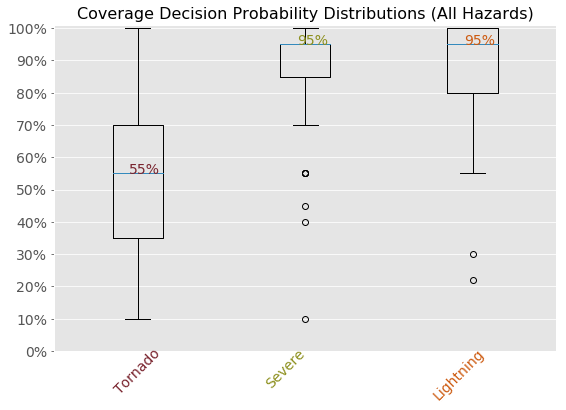

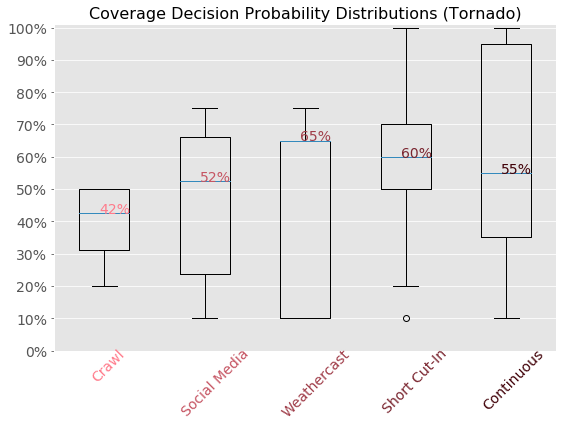

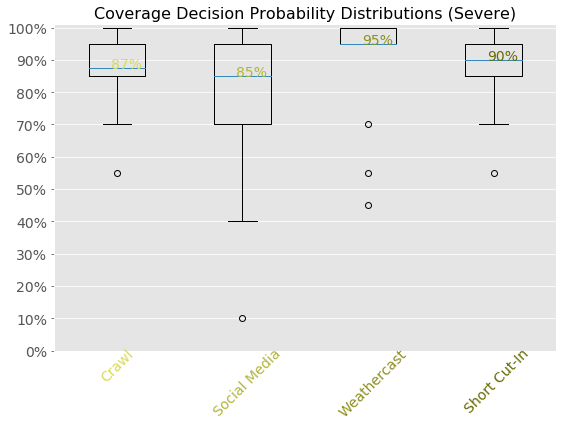

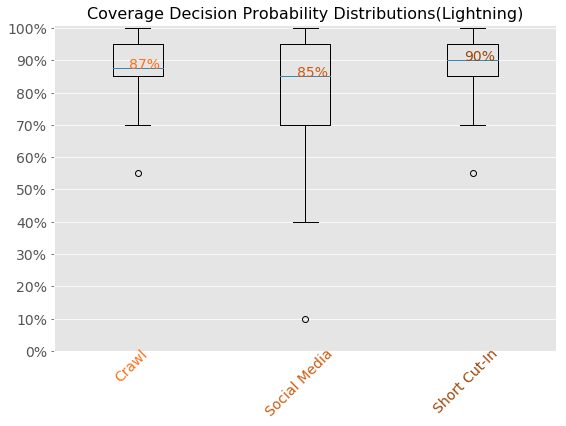

In [29]:
#This cell plots blox and whiskers of the decision data

#-------------------------------------------------------------------------------------------------------------------
#Box and whiskers for ALL hazards
#Create series to plots
datatoplot = [ptor1,psvr1,pltg1]
#print (datatoplot)

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(datatoplot)

#Set y-axis limits
plt.ylim(0, 101) 

#Set y-axis ticks
plt.yticks(range(0, 101, 10), [str(x) + "%" for x in range(0, 101, 10)], fontsize=14) 

#Set x-axis values to invisible
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

#Creat text for x-axis labels
plt.text(.85,-2,'Tornado',fontsize = 14,color="#7a252f",rotation=45)
plt.text(1.75,-2,'Severe',fontsize = 14,color="#8d901e",rotation=45)
plt.text(2.75,-2,'Lightning',fontsize = 14,color="#cd5b11",rotation=45)

#Find median and plot median text
metor = np.median(ptor1)
mesvr = np.median(psvr1)
meltg = np.median(pltg1)
metorint = int(metor)
mesvrint = int(mesvr)
meltgint = int(meltg)
plt.text(.95,metor,format(metorint)+"%",fontsize = 14,color="#7a252f")
plt.text(1.95,mesvr,format(mesvrint)+"%",fontsize = 14,color="#8d901e")
plt.text(2.95,meltg,format(meltgint)+"%",fontsize = 14,color="#cd5b11")

#Plot title
plt.title('Coverage Decision Probability Distributions (All Hazards)',fontsize = 16)
plt.show()

#--------------------------------------------------------------------------------------------------------------------
#Box and whiskers for TORNADO
#Create series to plots
tordatatoplot = [ptorcrawl1,ptorsm1,ptorwxcast1,ptorcutin1,ptorwall1]
#print (datatoplot)

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(tordatatoplot)

#Set x-axis limits
plt.ylim(0, 101) 

#Set x-axis ticks
plt.yticks(range(0, 101, 10), [str(x) + "%" for x in range(0, 101, 10)], fontsize=14) 

#Set x-axis values to invisible
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

#Creat text for x-axis labels
plt.text(.85,-2,'Crawl',fontsize = 14,color="#ff7a8a",rotation=45)
plt.text(1.75,-2,'Social Media',fontsize = 14,color="#c65563",rotation=45)
plt.text(2.75,-2,'Weathercast',fontsize = 14,color="#a03d49",rotation=45)
plt.text(3.75,-2,'Short Cut-In',fontsize = 14,color="#7a252f",rotation=45)
plt.text(4.75,-2,'Continuous',fontsize = 14,color="#410108",rotation=45)

#Find median and plot median text
metorcrawl  = np.median(ptorcrawl1)
metorsm     = np.median(ptorsm1)
metorwxcast = np.median(ptorwxcast1)
metorcutin  = np.median(ptorcutin1)
metorwall   = np.median(ptorwall1)

metorcrawlint  = int(metorcrawl)
metorsmint     = int(metorsm)
metorwxcastint = int(metorwxcast)
metorcutinint  = int(metorcutin)
metorwallint   = int(metorwall)

plt.text(.95,metorcrawl,format(metorcrawlint)+"%",fontsize = 14,color="#ff7a8a")
plt.text(1.95,metorsm,format(metorsmint)+"%",fontsize = 14,color="#c65563")
plt.text(2.95,metorwxcast,format(metorwxcastint)+"%",fontsize = 14,color="#a03d49")
plt.text(3.95,metorcutin,format(metorcutinint)+"%",fontsize = 14,color="#7a252f")
plt.text(4.95,metorwall,format(metorwallint)+"%",fontsize = 14,color="#410108")

#Plot title
plt.title('Coverage Decision Probability Distributions (Tornado)',fontsize = 16)
plt.show()

#--------------------------------------------------------------------------------------------------------------------
#Box and whiskers for SEVERE
#Create series to plots
svrdatatoplot = [psvrcrawl1,psvrsm1,psvrwxcast1,psvrcutin1]
#print (datatoplot)

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(svrdatatoplot)

#Set x-axis limits
plt.ylim(0, 101) 

#Set x-axis ticks
plt.yticks(range(0, 101, 10), [str(x) + "%" for x in range(0, 101, 10)], fontsize=14) 

#Set x-axis values to invisible
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

#Creat text for x-axis labels
plt.text(.85,-2,'Crawl',fontsize = 14,color="#d9da5b",rotation=45)
plt.text(1.75,-2,'Social Media',fontsize = 14,color="#b3b53d",rotation=45)
plt.text(2.75,-2,'Weathercast',fontsize = 14,color="#8d901e",rotation=45)
plt.text(3.75,-2,'Short Cut-In',fontsize = 14,color="#676b00",rotation=45)

#Find median and plot median text
mesvrcrawl  = np.median(psvrcrawl1)
mesvrsm     = np.median(psvrsm1)
mesvrwxcast = np.median(psvrwxcast1)
mesvrcutin  = np.median(psvrcutin1)

mesvrcrawlint  = int(mesvrcrawl)
mesvrsmint     = int(mesvrsm)
mesvrwxcastint = int(mesvrwxcast)
mesvrcutinint  = int(mesvrcutin)

plt.text(.95,mesvrcrawl,format(mesvrcrawlint)+"%",fontsize = 14,color="#d9da5b")
plt.text(1.95,mesvrsm,format(mesvrsmint)+"%",fontsize = 14,color="#b3b53d")
plt.text(2.95,mesvrwxcast,format(mesvrwxcastint)+"%",fontsize = 14,color="#8d901e")
plt.text(3.95,mesvrcutin,format(mesvrcutinint)+"%",fontsize = 14,color="#676b00")

#Plot title
plt.title('Coverage Decision Probability Distributions (Severe)',fontsize = 16)
plt.show()

#--------------------------------------------------------------------------------------------------------------------
#Box and whiskers for LIGHTNING
#Create series to plots
ltgdatatoplot = [pltgcrawl1,pltgsm1,pltgcutin1]
#print (datatoplot)

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(ltgdatatoplot)

#Set x-axis limits
plt.ylim(0, 101) 

#Set x-axis ticks
plt.yticks(range(0, 101, 10), [str(x) + "%" for x in range(0, 101, 10)], fontsize=14) 

#Set x-axis values to invisible
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)

#Creat text for x-axis labels
plt.text(.85,-2,'Crawl',fontsize = 14,color="#ff6f1a",rotation=45)
plt.text(1.75,-2,'Social Media',fontsize = 14,color="#cd5b11",rotation=45)
plt.text(2.75,-2,'Short Cut-In',fontsize = 14,color="#9c4708",rotation=45)

#Find median and plot median text
meltgcrawl  = np.median(pltgcrawl1)
meltgsm     = np.median(pltgsm1)
meltgcutin  = np.median(pltgcutin1)

meltgcrawlint  = int(meltgcrawl)
meltgsmint     = int(meltgsm)
meltgcutinint  = int(meltgcutin)

plt.text(.95,meltgcrawl,format(meltgcrawlint)+"%",fontsize = 14,color="#ff6f1a")
plt.text(1.95,meltgsm,format(meltgsmint)+"%",fontsize = 14,color="#cd5b11")
plt.text(2.95,meltgcutin,format(meltgcutinint)+"%",fontsize = 14,color="#9c4708")

#Plot title
plt.title('Coverage Decision Probability Distributions(Lightning)',fontsize = 16)
plt.show()